In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("data/zomato_df_final_data.csv")

In [10]:
df.head()

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


In [86]:
df.dtypes

address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object

In [89]:
df.isna().sum()

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

In [39]:
df["cuisine"].dtype
#dtype("0") means object

dtype('O')

In [43]:
# check = df["cuisine"].unique()
# for item in check:
#     print(item)
#not helpful

In [22]:
type(df["cuisine"][0])

str

In [33]:
temp = df["cuisine"][0]
temp
# string

"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']"

In [36]:
import re
#pattern = r'[\'\[\],]'
pattern = r',\s*' #removing comma(,) followed by immediate space
cleaned_text = re.sub(pattern, '-', temp)
pattern2 = r'[\'\[\],]'
cleaned_text = re.sub(pattern2, "", cleaned_text)
cleaned_text

'Hot Pot-Korean BBQ-BBQ-Korean'

In [56]:
temp = cleaned_text.split("-")
for a in temp:
    print(a)

Hot Pot
Korean BBQ
BBQ
Korean


In [62]:
# store all cusines in a set
cuisines = set()

#custom function to check all the values
def get_cuisine(str):
    pattern = r',\s*' #removing comma(,) followed by immediate space
    cleaned_text = re.sub(pattern, '-', str)
    pattern2 = r'[\'\[\],]'
    cleaned_text = re.sub(pattern2, "", cleaned_text)
    temp = cleaned_text.split("-")
    for cuisine in temp:
        cuisines.add(cuisine)

# Sydney restaurants sell the following number of cuisines

In [63]:
for value in df["cuisine"]:
    get_cuisine(value)
len(cuisines)

135

# Restaurants in each suburb

In [68]:
top_3 = df["subzone"].value_counts().sort_values(ascending=False).head(3)
top_3

CBD            476
Surry Hills    260
Parramatta     225
Name: subzone, dtype: int64

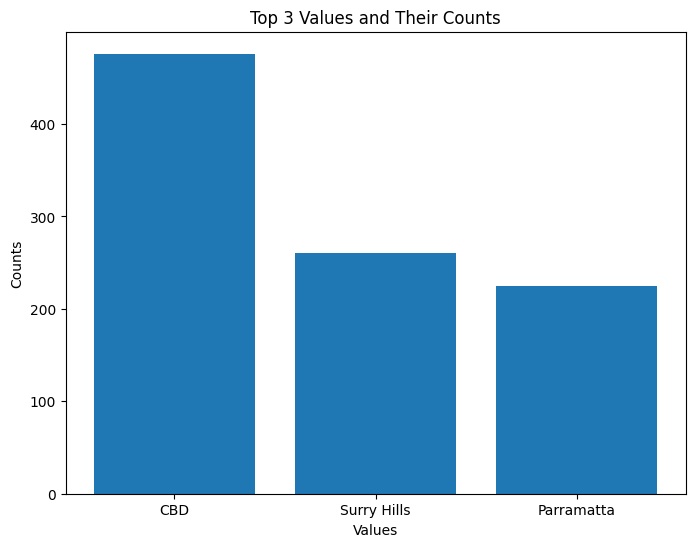

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(top_3.index, top_3.values)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Top 3 Values and Their Counts')
plt.show()

# Cost vs rating

In [74]:
cost_rating = df[["cost", "rating_text"]]
cost_rating.dtypes

cost           float64
rating_text     object
dtype: object

In [83]:
result_df = df.groupby('rating_text')['cost'].mean().reset_index()
result_df.columns = ['rating', 'average_cost']
result_df = result_df.sort_values(by='average_cost', ascending=False)
result_df

,rating,average_cost
1,Excellent,101.666667
4,Very Good,71.515810
2,Good,59.528114
3,Poor,55.845771
0,Average,51.021267


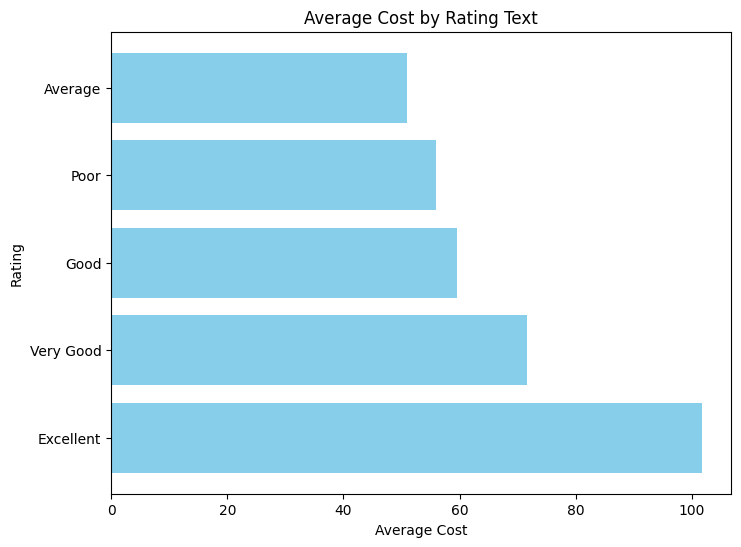

In [90]:
plt.figure(figsize=(8, 6))
plt.barh(result_df['rating'], result_df['average_cost'], color='skyblue')

# Customize labels and title
plt.xlabel('Average Cost')
plt.ylabel('Rating')
plt.title('Average Cost by Rating Text')

# Show the chart
plt.show()